In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder




from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
#from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint




import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
print(os.getcwd())

/content


In [7]:
mit_test_data = pd.read_csv("kaggle/input/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("kaggle/input/mitbih_train.csv", header=None)

In [8]:
from sklearn.utils import resample

df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=mit_test_data[mit_train_data[187]==1]
df_22=mit_test_data[mit_train_data[187]==2]
df_33=mit_test_data[mit_train_data[187]==3]
df_44=mit_test_data[mit_train_data[187]==4]
df_00=(mit_test_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_11_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_22_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_33_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_44_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])


equilibre=train_df[187].value_counts()
print(equilibre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64


In [9]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((train_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64


In [ ]:
test = pd.read_csv("kaggle/input/mitbih_test.csv", header=None)
test = test.iloc[0,0:len(test.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

In [11]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

np.random.seed(7)

In [15]:
from tensorflow.keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
10153  0.162791  0.540698  0.755814  0.186047  0.168605  0.546512  0.616279   
33886  0.990066  0.938742  0.344371  0.034768  0.273179  0.331126  0.326159   
32005  0.974239  0.932084  0.590164  0.131148  0.014052  0.168618  0.238876   
56159  0.978495  0.723118  0.526882  0.298387  0.220430  0.158602  0.091398   
61783  0.963351  0.709424  0.060209  0.013089  0.057592  0.041885  0.047120   

            7         8         9    ...  177  178  179  180  181  182  183  \
10153  0.697674  0.651163  0.703488  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33886  0.341060  0.347682  0.347682  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32005  0.210773  0.196721  0.208431  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
56159  0.091398  0.080645  0.083333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
61783  0.034031  0.039267  0.044503  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
10153  0.0  0.0  

In [16]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [17]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)

    X = Conv1D(64, 7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides= 2)(X)

    X = convolutional_block(X, f=3, filters=[128, 128, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='b')
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size= 2, padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet')
    
    
    
    model.add(Conv1D(32,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(64,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(128,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(256,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))
    
    model.add(Conv1D(512,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(5,"micro")])
    
    return model

In [18]:
# create the model.
from keras.callbacks import History 
history = History()
embedding_vecor_length = 187

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, epochs=20)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Epoch 1/20
3125/3125 [==============================] - 9s 2ms/step - loss: 0.4828 - accuracy: 0.8233
Epoch 2/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3035 - accuracy: 0.8908
Epoch 3/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2412 - accuracy: 0.9120
Epoch 4/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2032 - accuracy: 0.9268
Epoch 5/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1760 - accuracy: 0.9385
Epoch 6/20
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1556 - accuracy: 0.9464
Epoch 7/20
3125/3125 [==============================] - 8s 3ms/step - loss: 0.1407 - accuracy: 0.9521
Epoch 8/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1291 - accuracy: 0.9564
Epoch 9/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1209 - accuracy: 0.9592
Epoch 10/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.111

dict_keys(['loss', 'accuracy'])


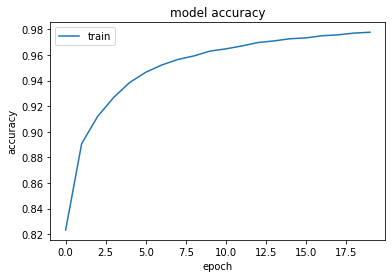

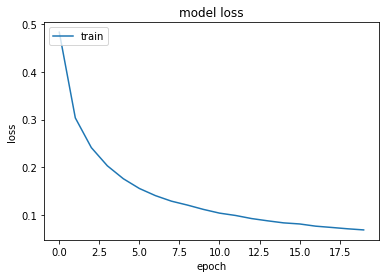

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(testX, batch_size=1000)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     16569
           1       0.97      0.97      0.97     20513
           2       0.98      0.97      0.98     21320
           3       0.96      0.99      0.98     20147
           4       0.99      1.00      0.99     21451

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000



In [21]:
test.to_csv("new_data.csv")

In [22]:
test = pd.read_csv("new_data.csv")

In [ ]:
test